### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

Data = pd.read_csv('HR_Missing_Vslues.csv')

print('Shape of DataFrame:', Data.shape)
print('Size of DataFrame:', Data.size)

In [2]:
Data = pd.read_csv('HRDataset_v14.csv')

print('Shape of DataFrame:', Data.shape)
print('Size of DataFrame:', Data.size)

Shape of DataFrame: (311, 36)
Size of DataFrame: 11196


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
Data.head().T

,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825


### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

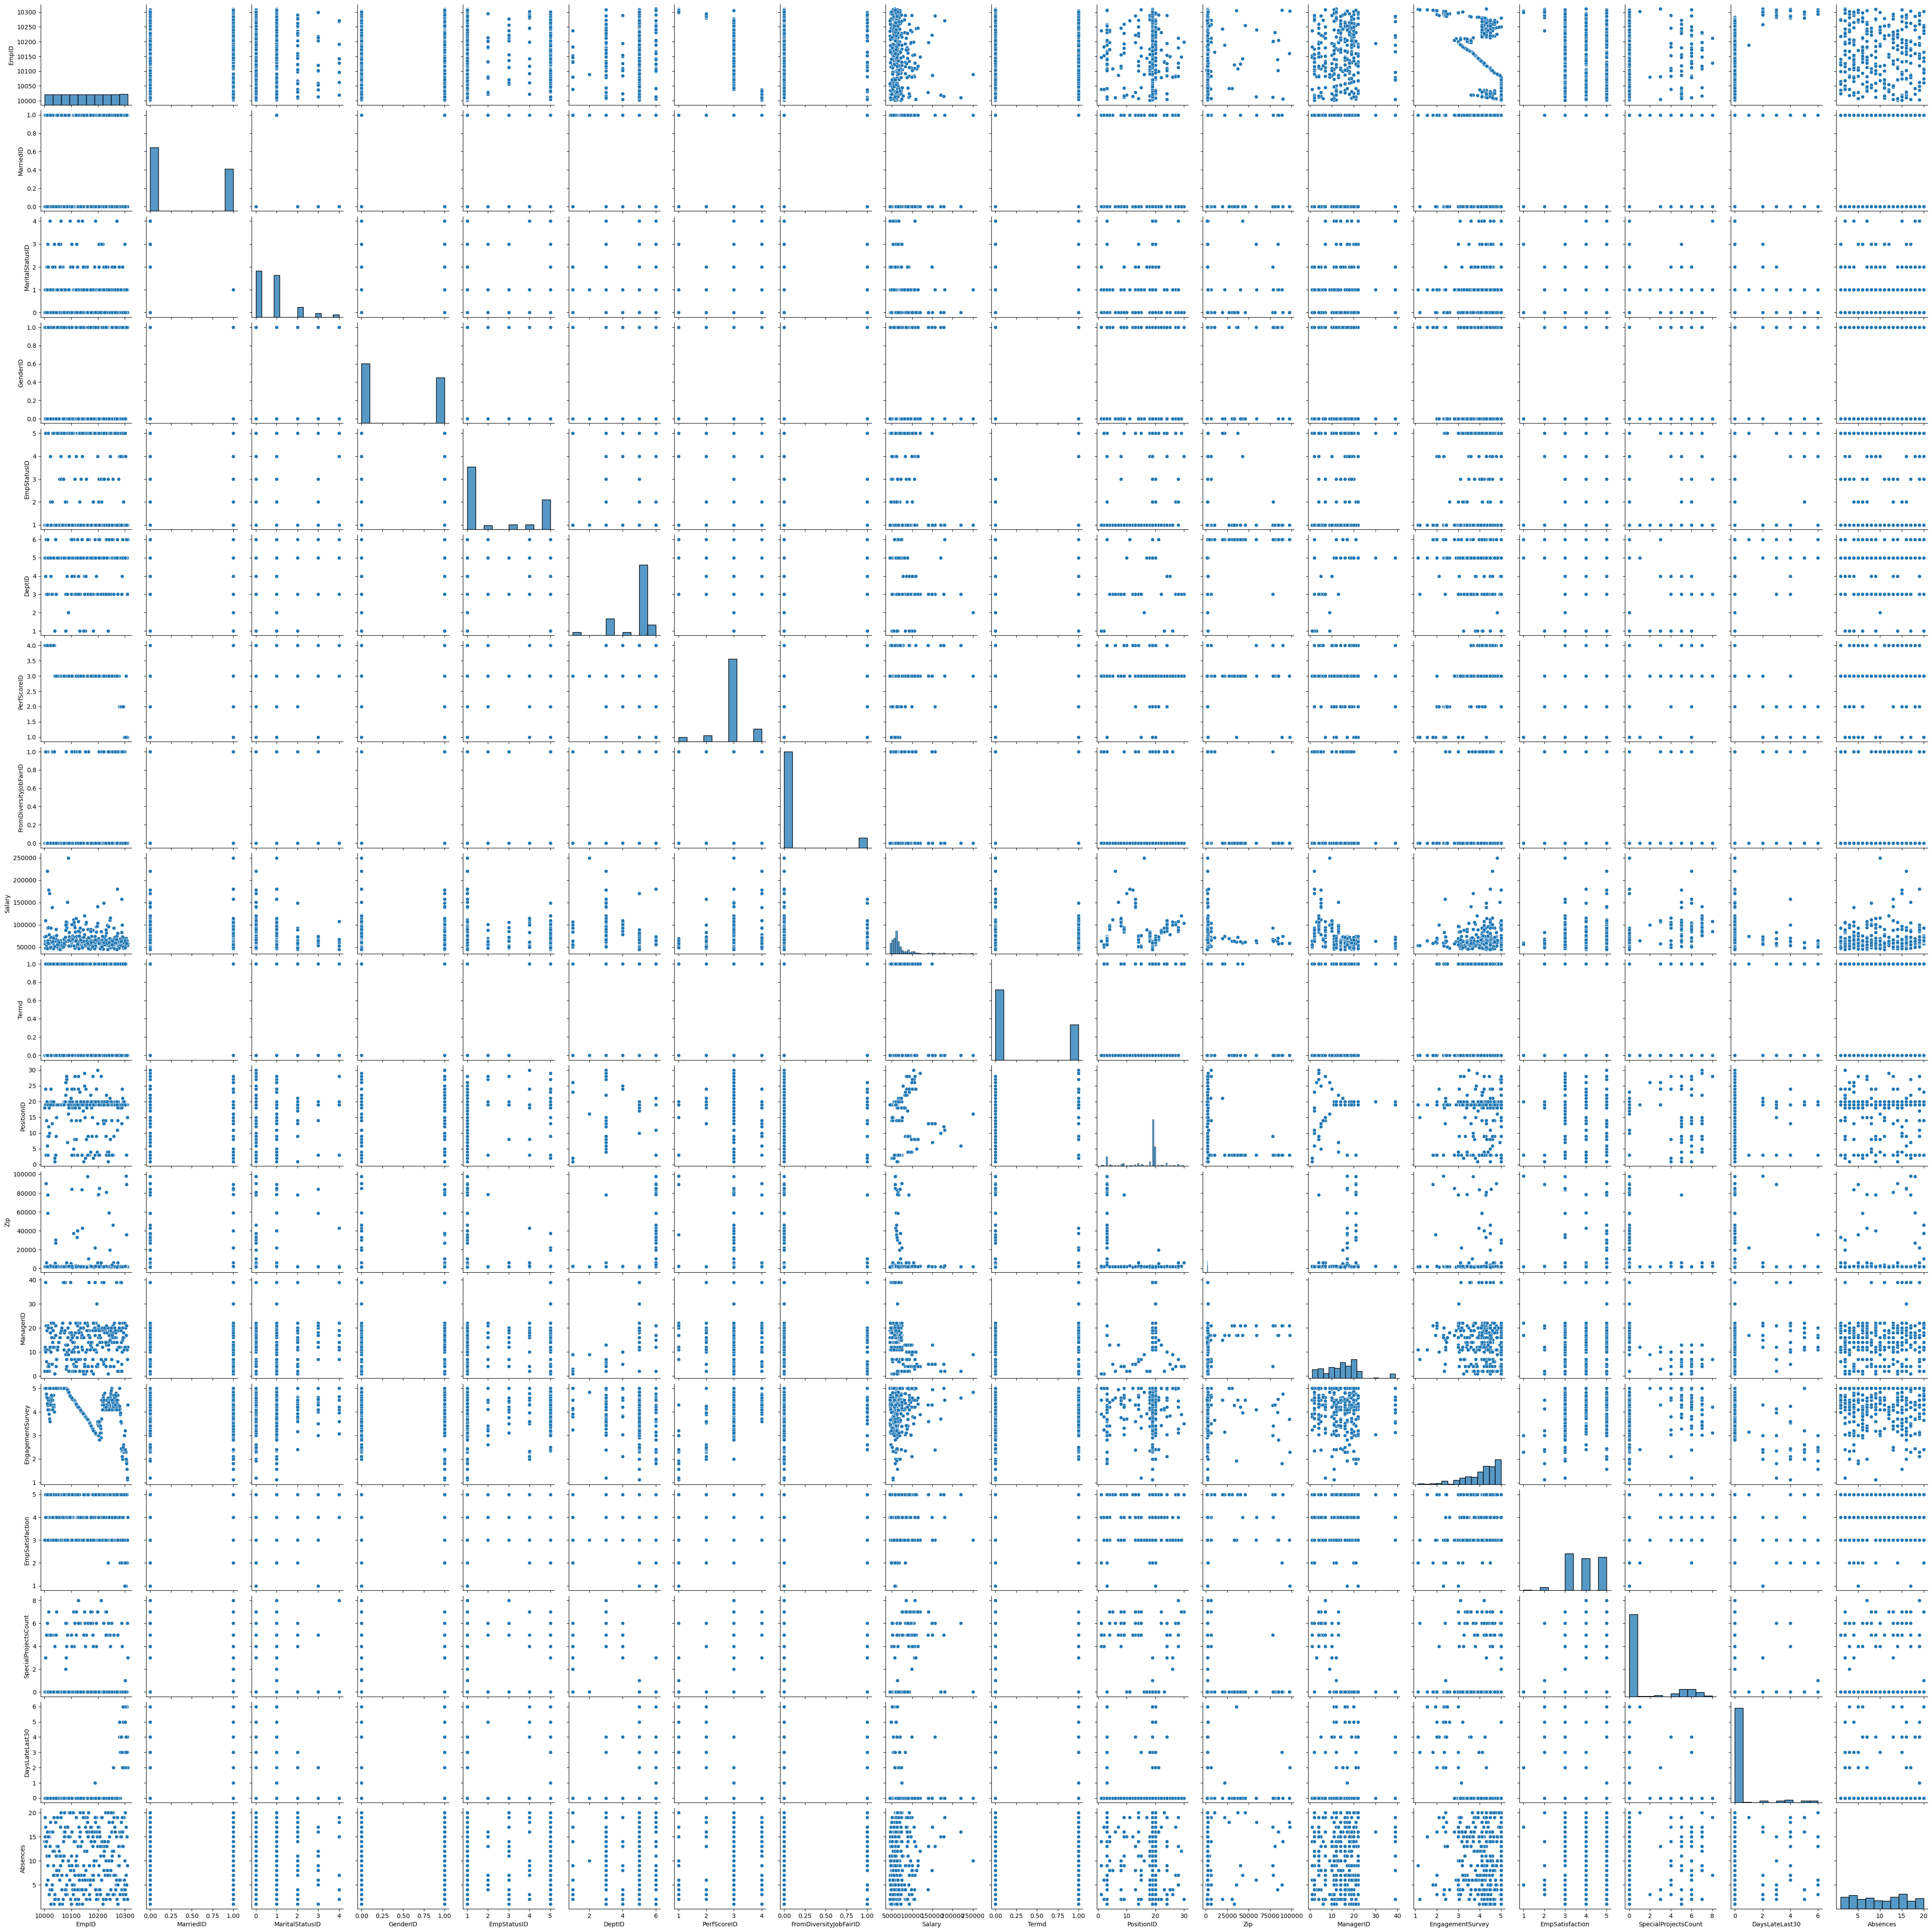

In [5]:
sns.pairplot(Data);

# First chart

In [6]:
Data['Sex'].value_counts()

F     176
M     135
Name: Sex, dtype: int64

In [7]:
total = Data['Sex'].value_counts()

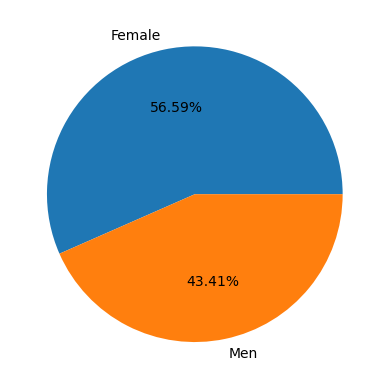

In [8]:
plt.pie(total, labels=['Female','Men'] , autopct='%1.2f%%')
plt.show()

#### Write your insghts here

- The percentage of females who have been employed is greater than the percentage of men.
- I think the reason is the salary or job performance.

# Second chart

In [9]:
Data['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

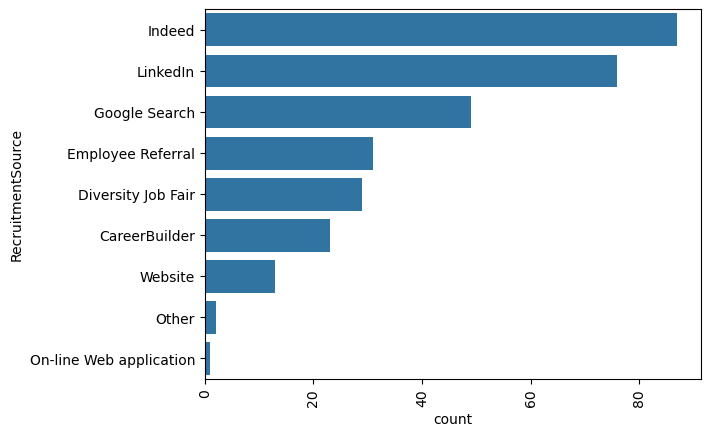

In [10]:
Orderr = Data['RecruitmentSource'].value_counts().index
sns.countplot(data=Data, y= "RecruitmentSource",order=Orderr,
              color = sns.color_palette()[0])
plt.xticks(rotation=90)
plt.show()

#### Write your insghts here

-  Most employees were employed through the Indeed and Linkedin platforms.
- I think the reason is the widespread use of Indeed and linkedin.
- I think that job submissions using Online Web applications will disappear in the future.

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

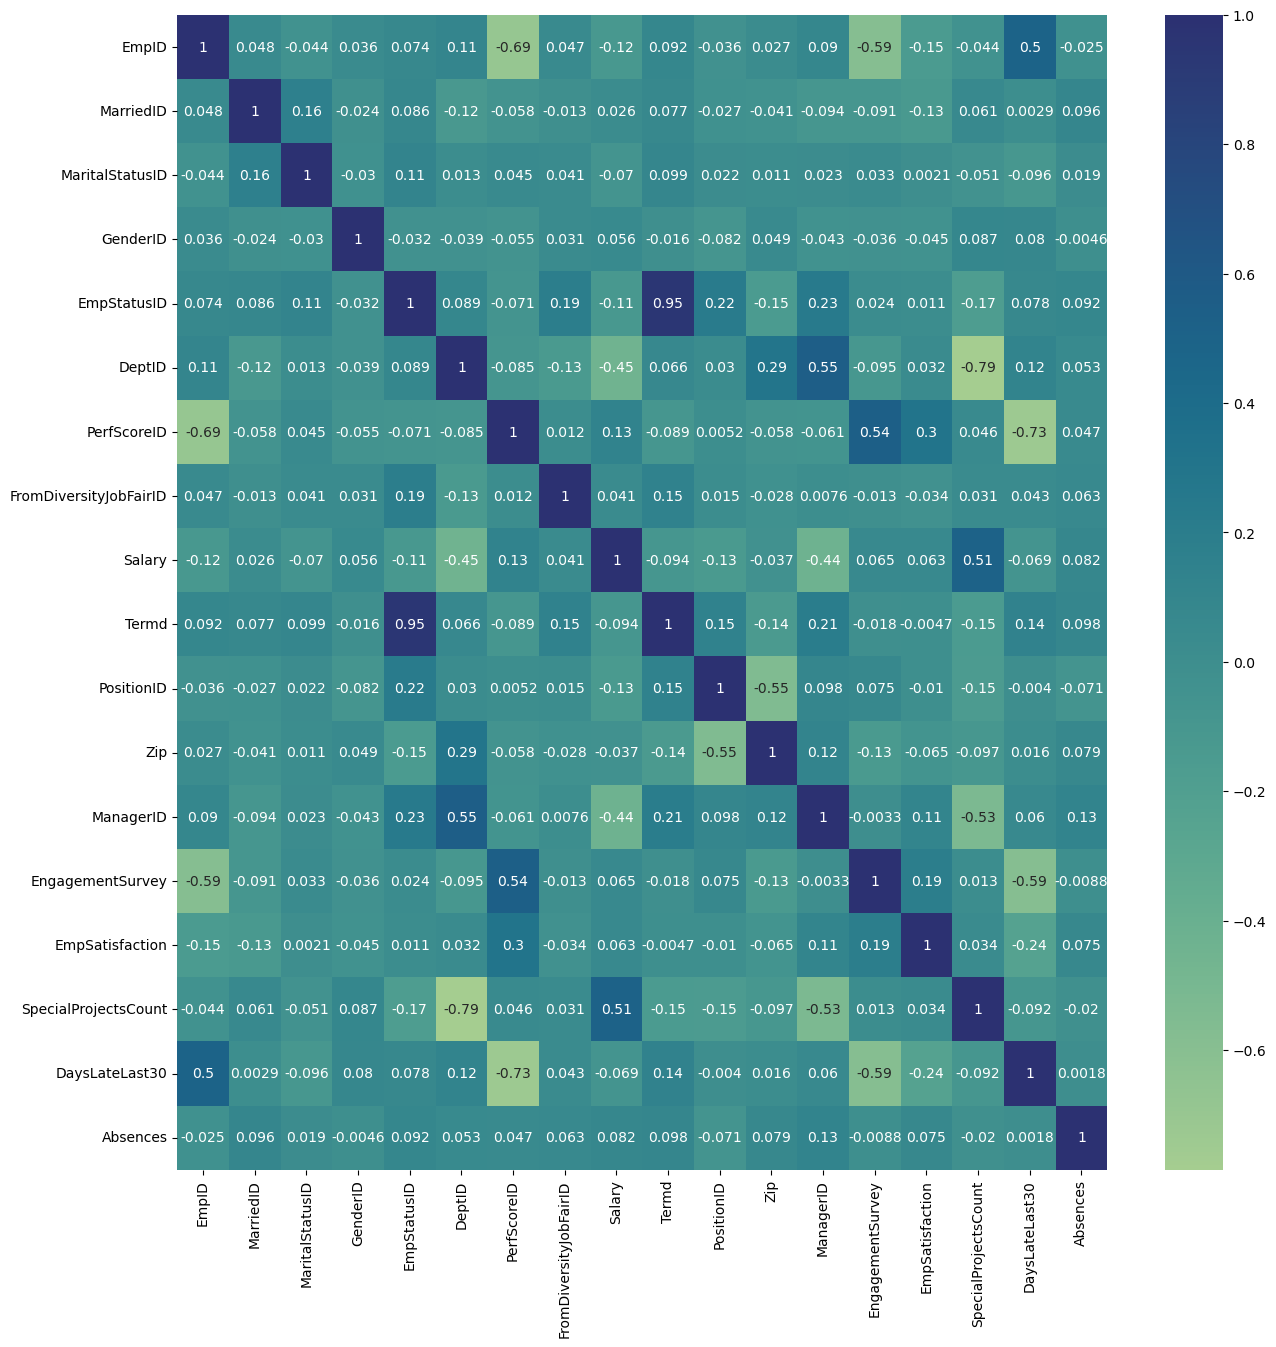

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr(),annot=True,cmap="crest")
plt.show()

- There is a strong positive relationship between EmpStatusID and Temd

# First chart

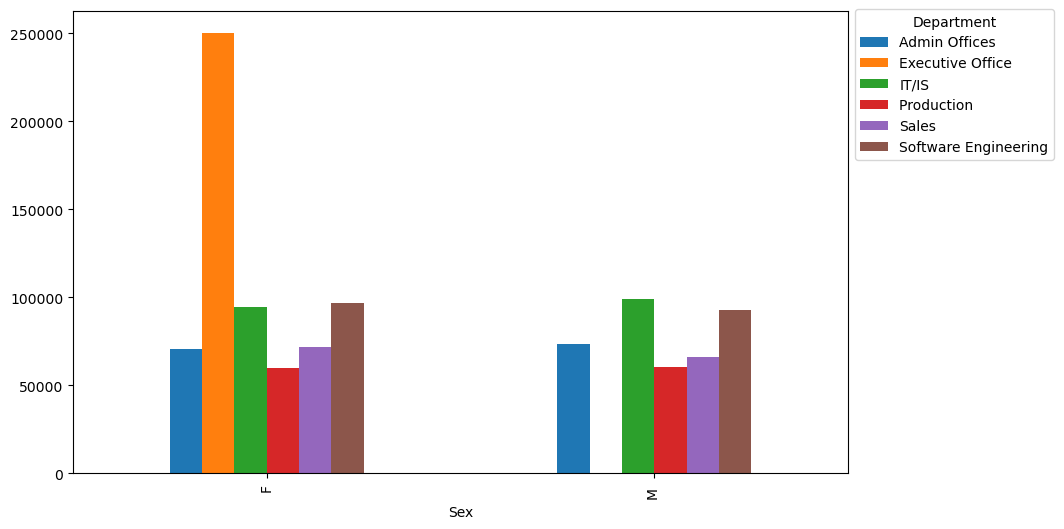

In [12]:
DepartmentSalary=pd.crosstab(Data.Sex,Data.Department,values=Data.Salary, aggfunc=np.average).plot(kind="bar",figsize=(10,6))
DepartmentSalary.legend(title='Department', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

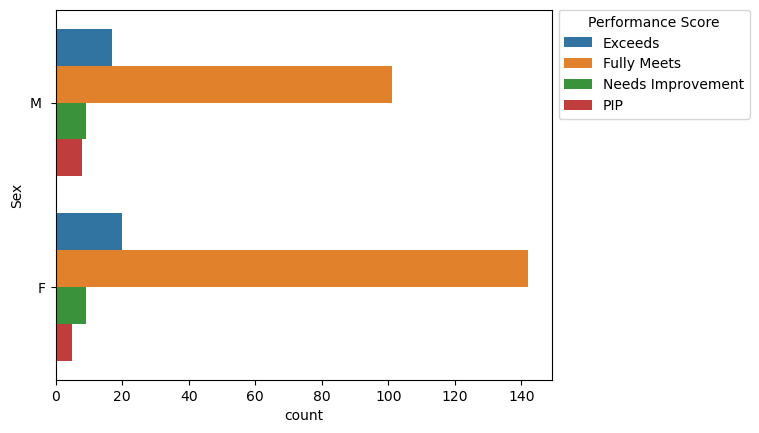

In [13]:
DepartmentPerformanceScore=sns.countplot(data=Data, y = 'Sex',hue='PerformanceScore');
DepartmentPerformanceScore.legend(title='Performance Score', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

#### Write your insghts here

- We see that there is no significant difference in salary between males and females in the following departments ().
- we see that the Executive Office job is monopolized by females, so I think there is a bias towards females or females performance is better than men

# Second chart

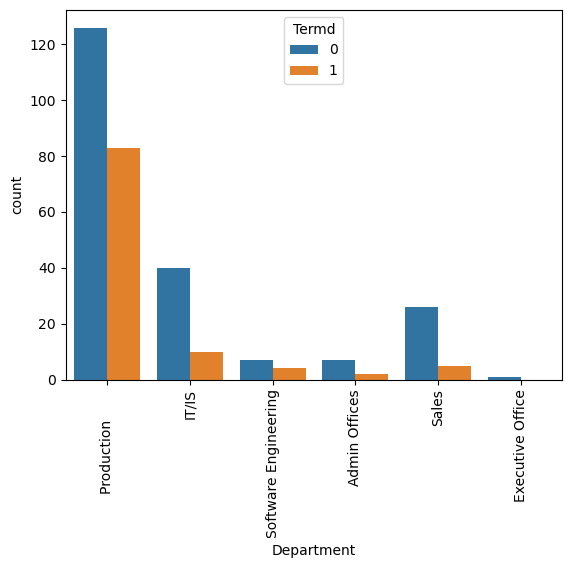

In [14]:
ax = sns.countplot(x="Department", hue="Termd", data=Data )

loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90);
plt.show()

#### Write your insghts here

- There are many employees who left the company in the production department. 
- I think the reason is bad treatment from the department manager, or find another job opportunity.

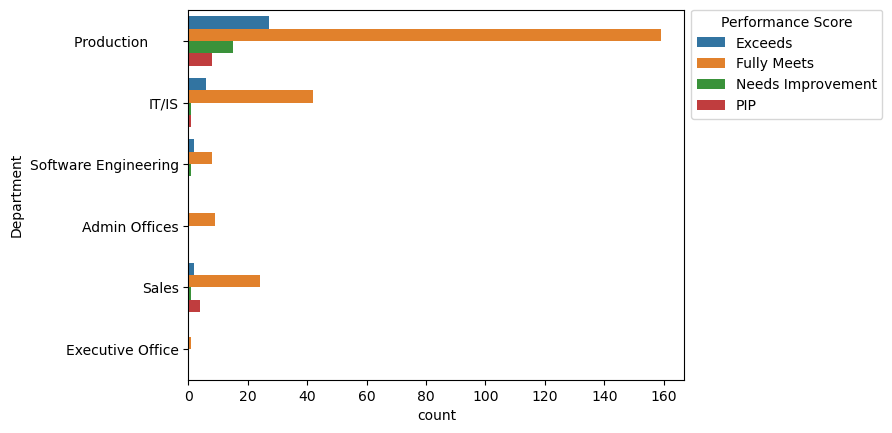

In [15]:
DepartmentPerformanceScore=sns.countplot(data=Data, y = 'Department',hue='PerformanceScore');
DepartmentPerformanceScore.legend(title='Performance Score', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

#### Write your insghts here

- Here it appears that the production department is the best in performance

- The closest reason for leaving the production department that employee may be get a better job offer

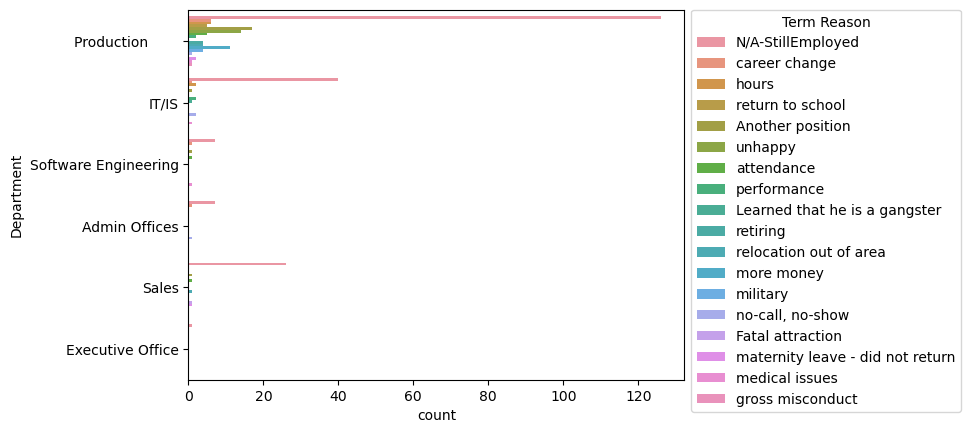

In [16]:
DepartmentPerformanceScore=sns.countplot(data=Data, y = 'Department',hue='TermReason');
DepartmentPerformanceScore.legend(title='Term Reason', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

#### Write your insghts here

- Here we find that the most reason for leaving work in the production department is git another position and be unhappy.

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

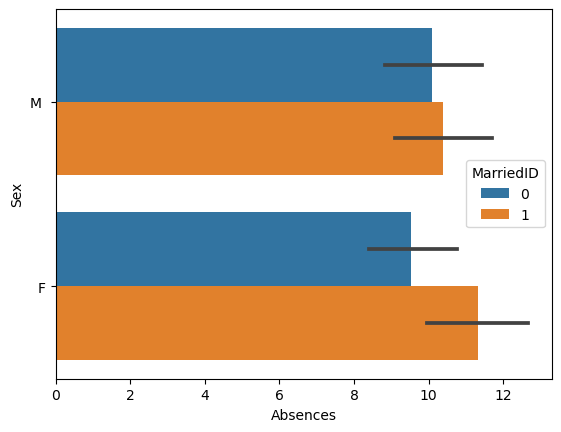

In [17]:
sns.barplot(data=Data, x="Absences", y="Sex", hue = 'MarriedID')
plt.show()

#### Write your insghts here

- The absence of married employees is more than single and the absence of married female employees is more than married men. 
- I think that because of the responsibilities of the employee's family. 

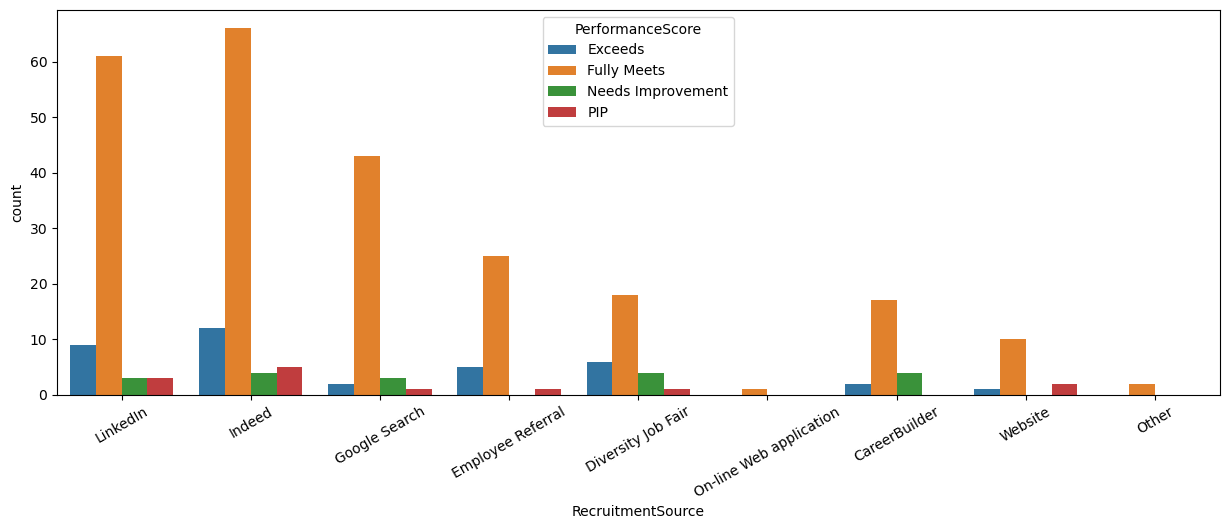

In [18]:
plt.figure(figsize = [15, 5])
sns.countplot(data= Data, x='RecruitmentSource', hue ='PerformanceScore')
plt.xticks(rotation=30)
plt.show()

#### Write your insghts here

- Despite the different recruitment platforms, the performance of the employees is similar, and this may be due to there is someone who chose all the employees.